In [17]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
#assign colors
def getColor(count):
    if count % 6 == 1:
        color = "red"
    elif count % 6 == 2:
        color = "purple"
    elif count % 6 == 3:
        color = "yellow"
    elif count % 6 == 4:
        color = "blue"
    elif count % 6 == 5:
        color = "orange"
    else:
         color = "green"

    return color

In [19]:
#assign colors, special places
def makeBoard():

    spaces = []

    count = 0
    for index in range(1, 141):
        if index == (9 or 18 or 43 or 75 or 96 or 104):
            spaces.append((index, "special"))
        else:
            count += 1
            color = getColor(count)
            spaces.append((index, color))

    return spaces

In [20]:
#simulate candyland distribution of cards
def getMove():

    chance = random.randint(0,66)

    #double move cards
    if chance < 2:
        move = ("red", 2)
    elif chance < 4 and chance >= 2:
        move = ("purple", 2)
    elif chance < 6 and chance >= 4:
        move = ("yellow", 2)
    elif chance < 8 and chance >= 6:
        move = ("blue", 2)
    elif chance < 10 and chance >= 8:
        move = ("orange", 2)
    elif chance < 12 and chance >= 10:
        move = ("green", 2)
    #single move cards
    elif chance < 20 and chance >= 12:
        move = ("red", 1)
    elif chance < 28 and chance >= 20:
        move = ("purple", 1)
    elif chance < 36 and chance >= 28:
        move = ("yellow", 1)
    elif chance < 44 and chance >= 36:
        move = ("blue", 1)
    elif chance < 52 and chance >= 44:
        move = ("orange", 1)
    elif chance < 60 and chance >= 52:
        move = ("green", 1)
    #special cards
    else:
        if chance == 60:
            move = ("Lord Licorice", 1)
        elif chance == 61:
            move = ("Candy Cane", 1)
        elif chance == 62:
            move = ("Gumdrop Mountain", 1)
        elif chance == 63:
            move = ("Grandma Nut", 1)
        elif chance == 64:
            move = ("Princess Lolly", 1)
        else:
            move = ("Queen Frostine", 1)

    return move

In [21]:
def playGame():

    board = makeBoard()
    current = 0
    moveList = []

    #play until pass end point
    while current < 134:

        (move, number) = getMove()

        #factor in cards that advance two spaces
        if number == 2:
            add = 7
        else:
            add = 1

        if move == "Lord Licorice":
            current = 9
        elif move == "Candy Cane":
            current = 18
        elif move == "Gumdrop Mountain":
            current = 43
        elif move == "Grandma Nut":
            current = 75
        elif move == "Princess Lolly":
            current = 96
        elif move == "Queen Frostine":
            current = 104
        else:

            for spaces in range(current + add, 140):

                if move == board[spaces][1]:
                    current = [spaces][0]
                    break
                else:
                    continue

        moveList.append(move)

    return len(moveList)

The average number of turns taken to complete a game by myself is: 37
The longest number of turns taken to complete a game by myself is: 240
The shortest number of turns taken to complete a game by myself is: 6
The average length of the game if four people are playing together is: 925


C:\Users\aniru\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app


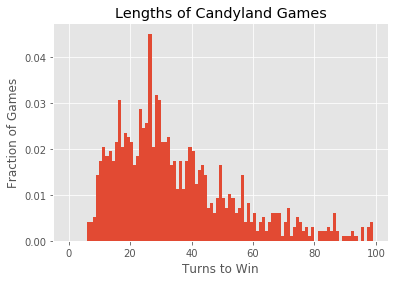

In [22]:
simulation = []
def runSimulation():
    

    for trial in range(1000):
        count = playGame()
        simulation.append(count)
    avg=simulation
    average=round(sum(avg)/len(avg))
    print("The average number of turns taken to complete a game by myself is: {}".format(average))
    print("The longest number of turns taken to complete a game by myself is: {}".format(max(avg)))
    print("The shortest number of turns taken to complete a game by myself is: {}".format(min(avg)))
    four_people=average*25
    print("The average length of the game if four people are playing together is: {}".format(four_people))
    plt.hist(simulation, bins = range(100), normed = True)
    plt.xlabel("Turns to Win")
    plt.ylabel('Fraction of Games')
    plt.title('Lengths of Candyland Games')
    
    
runSimulation()
